### Vamos a descongelar todas las capas

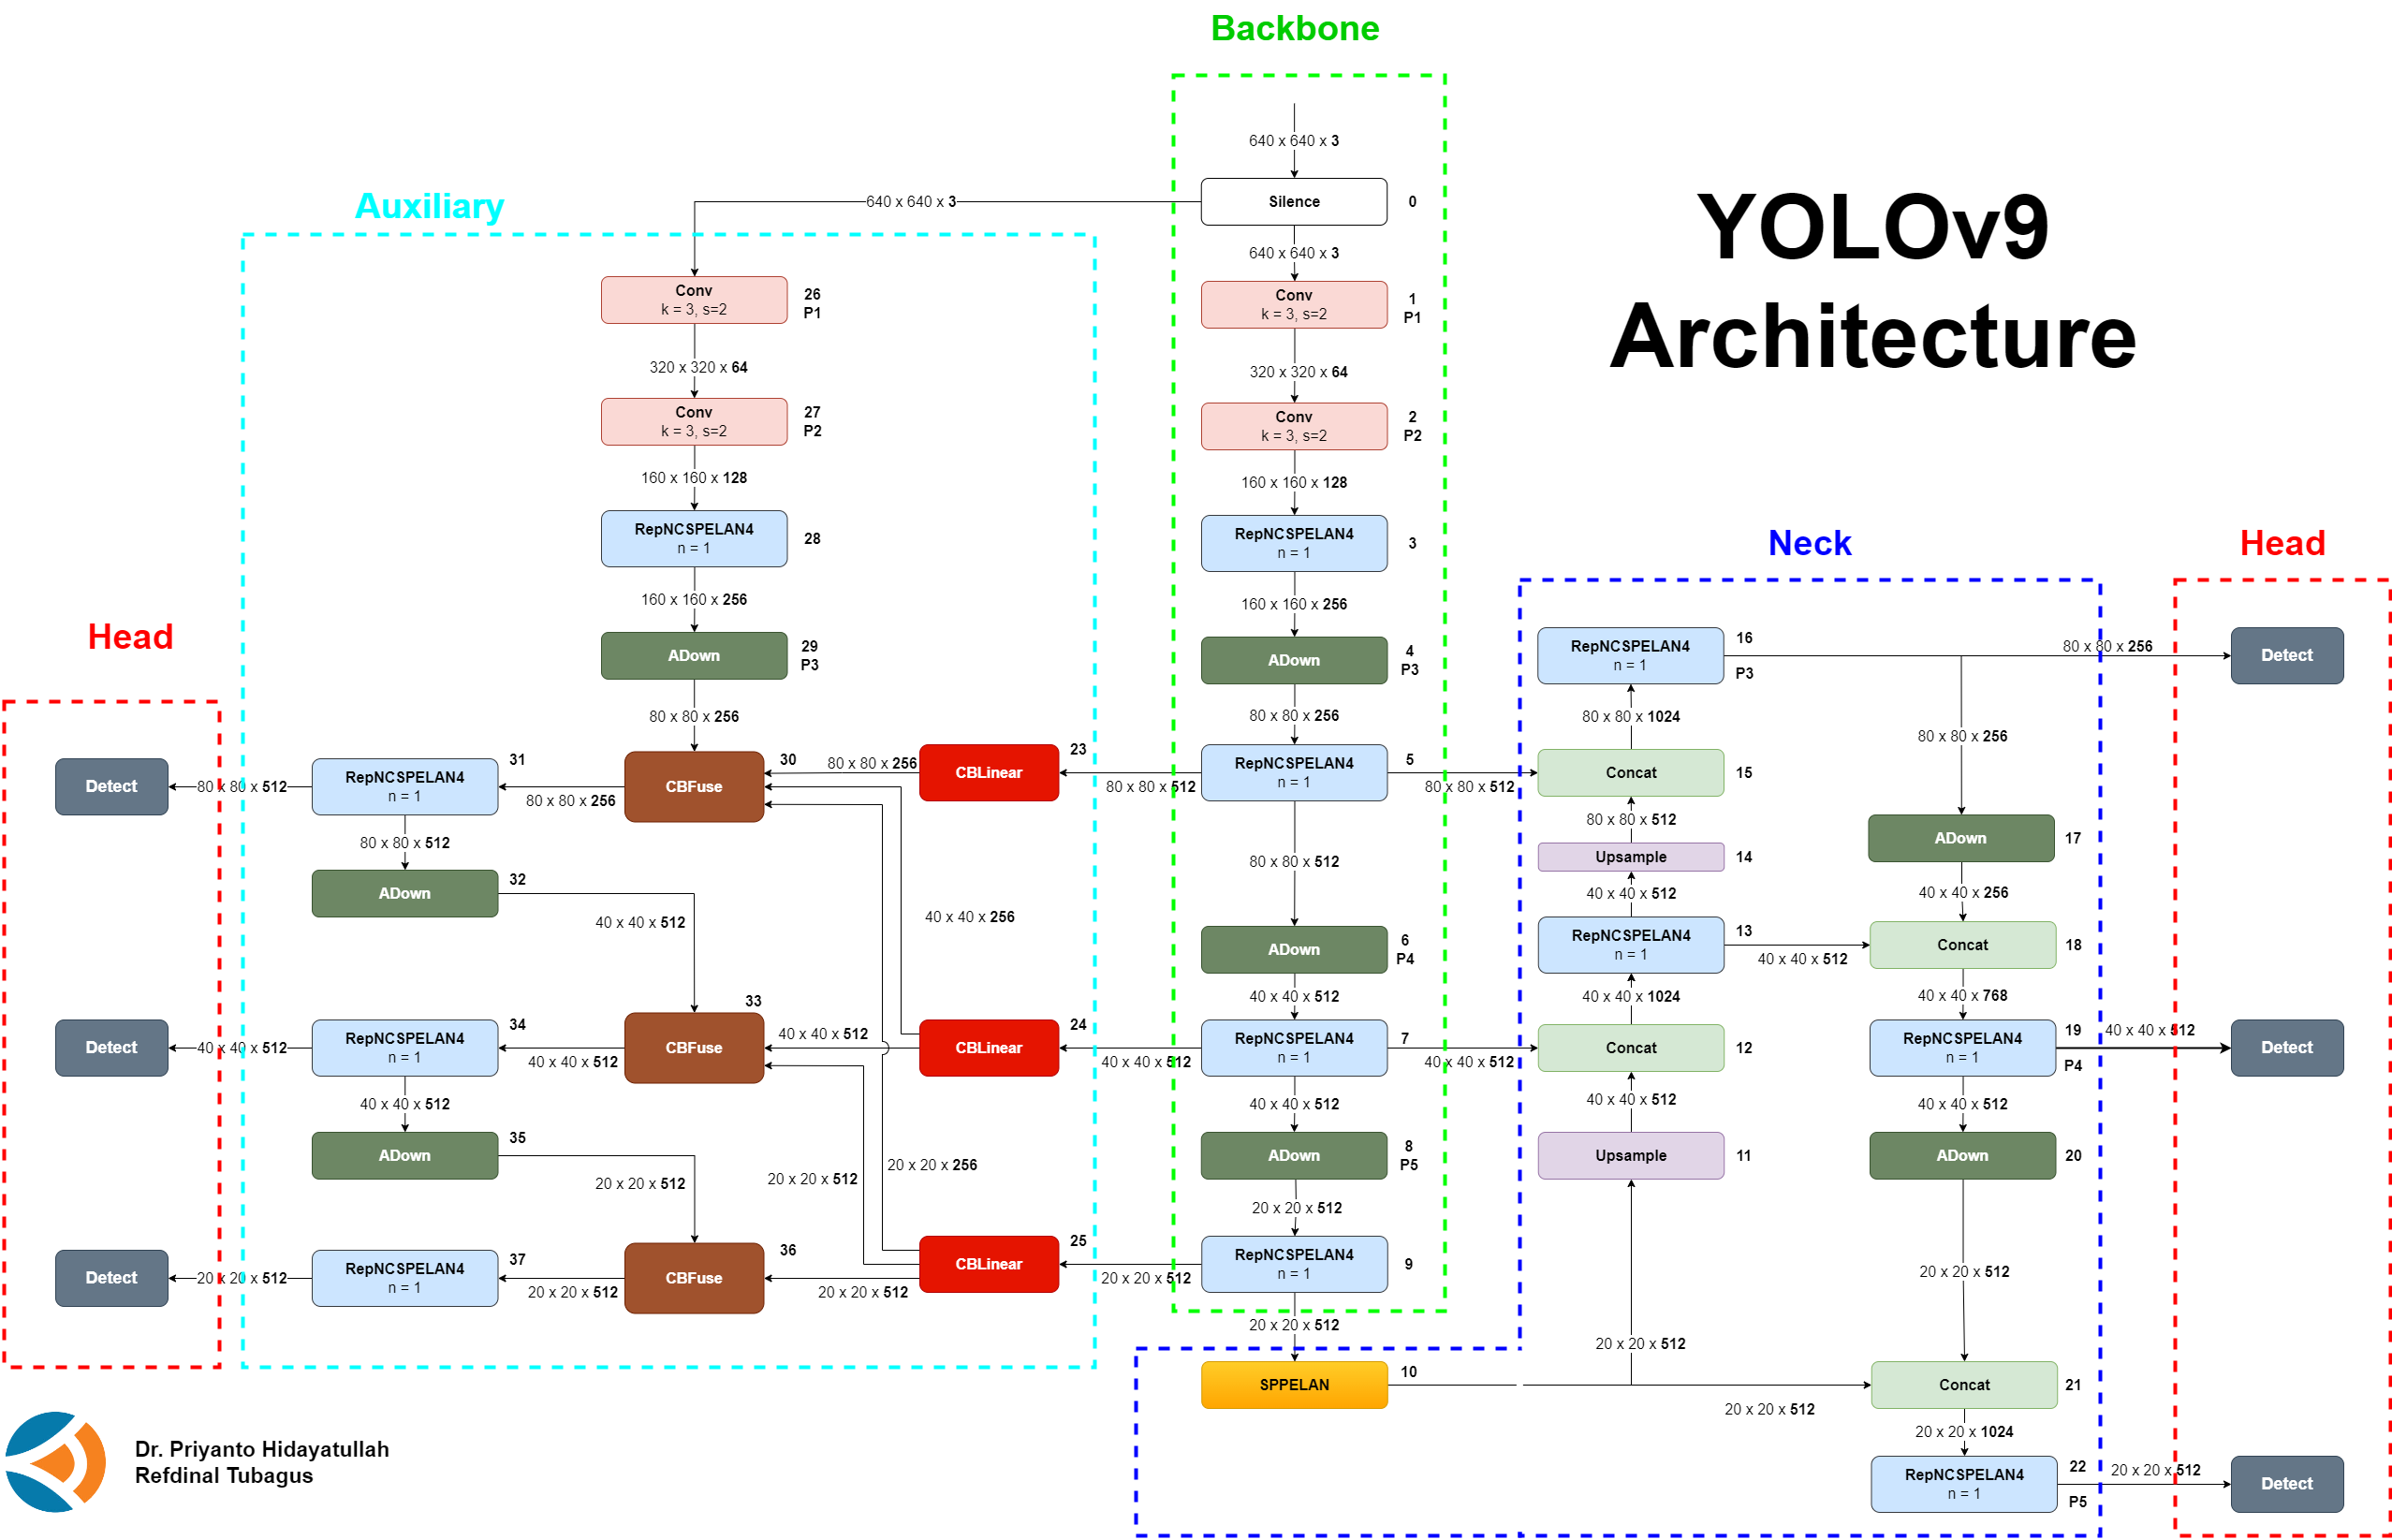

In [1]:
from IPython.display import Image, display

# Imagen de la arquitectura de yolo 9, en este caso es solo hasta la capa 22, sin usar el auxiliar y 
# la segunda cabeza de detección

display(Image(filename='yolov9-architecture.png'))

### Como podemos ver, si queremos descongelar el backbone, tenemos que descongelar desde el principio hasta el SPPELAN

In [1]:
from ultralytics import YOLO

# Cargar el modelo YOLO
model = YOLO('yolov9t.yaml')  # Cargar la configuración del modelo YOLOv8 desde cero


In [2]:
# descongelar todas las capas
for param in model.parameters():
    param.requires_grad = True

# verificamos que todas las capas estén descongeladas
for i, (name, param) in enumerate(model.named_parameters()):
    print(i, name, param.requires_grad)



0 model.model.0.conv.weight True
1 model.model.0.bn.weight True
2 model.model.0.bn.bias True
3 model.model.1.conv.weight True
4 model.model.1.bn.weight True
5 model.model.1.bn.bias True
6 model.model.2.cv1.conv.weight True
7 model.model.2.cv1.bn.weight True
8 model.model.2.cv1.bn.bias True
9 model.model.2.cv2.conv.weight True
10 model.model.2.cv2.bn.weight True
11 model.model.2.cv2.bn.bias True
12 model.model.2.cv3.conv.weight True
13 model.model.2.cv3.bn.weight True
14 model.model.2.cv3.bn.bias True
15 model.model.2.cv4.conv.weight True
16 model.model.2.cv4.bn.weight True
17 model.model.2.cv4.bn.bias True
18 model.model.3.cv1.conv.weight True
19 model.model.3.cv1.bn.weight True
20 model.model.3.cv1.bn.bias True
21 model.model.4.cv1.conv.weight True
22 model.model.4.cv1.bn.weight True
23 model.model.4.cv1.bn.bias True
24 model.model.4.cv2.0.cv1.conv.weight True
25 model.model.4.cv2.0.cv1.bn.weight True
26 model.model.4.cv2.0.cv1.bn.bias True
27 model.model.4.cv2.0.cv2.conv.weight True


### Resultados del entrenamiento base

In [3]:
# Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
# 115/200  1.74G      1.224      1.097      1.318         15        512: 100%|██████████| 644/644 [02:12<00:00,  4.86it/s]
#                  Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.88it/s]
#                    all       1467       4759      0.754      0.657      0.728      0.471
# EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 105, best model saved as best.pt.
# To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.


# 115 epochs completed in 4.688 hours.
# Optimizer stripped from resultados_200_epoc/yolo9n_200_epoc/weights/last.pt, 4.6MB
# Optimizer stripped from resultados_200_epoc/yolo9n_200_epoc/weights/best.pt, 4.6MB

# Validating resultados_200_epoc/yolo9n_200_epoc/weigh# ts/best.pt...
# Ultralytics 8.3.53 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
# YOLOv9t summary (fused): 486 layers, 1,973,124 parameters, 0 gradients, 7.6 GFLOPs
#                  Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.41it/s]
#                    all       1467       4759      0.745       0.66      0.727      0.473
#                Bicycle        147        232      0.802      0.733       0.79      0.538
#                   Boat        139        293      0.697      0.645       0.68      0.383
#                 Bottle        132        309      0.821       0.65      0.752      0.457
#                    Bus        117        137      0.883      0.876      0.906      0.745
#                    Car        257        555      0.802      0.678      0.763      0.507
#                    Cat        152        168      0.751      0.744      0.789      0.498
#                  Chair        252        500      0.706      0.534      0.617      0.367
#                    Cup        168        307      0.688      0.567      0.619      0.421
#                    Dog        173        200      0.703      0.711      0.764       0.51
#              Motorbike        118        226      0.677      0.642      0.701      0.438
#                 People        556       1514      0.788      0.631      0.748      0.432
#                  Table        210        318      0.624      0.513      0.591      0.376
# Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 1.2ms postprocess per image
# Results saved to resultados_200_epoc/yolo9n_200_epoc yolo9n_Back_0-8_lrBaja_/results.txt



#### Entrenamiento de 0

In [2]:
resultados = model.train(data='../../data/data.yaml', epochs=1000, project='resultados_fineTunning', name='yolo9n_de_CERO_', imgsz=512, batch=8, patience=40)

New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.53 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.yaml, data=../../data/data.yaml, epochs=1000, time=None, patience=40, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=resultados_fineTunning, name=yolo9n_de _CERO_, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

E0000 00:00:1735453010.288622  262295 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735453010.305010  262295 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7872  ultralytics.nn.modules.block.ELAN1           [32, 32, 32, 16]              
  3                  -1  1     18560  ultralytics.nn.modules.block.AConv           [32, 64]                      
  4                  -1  1     65216  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 64, 64, 32, 3]           
  5                  -1  1     55488  ultralytics.nn.modules.block.AConv           [64, 96]                      
  6                  -1  1    145824  ultralytics.nn.modules.block.RepNCSPELAN4    [96, 96, 96, 48, 3]           
  7                  -1  1    110848  ultralytic

train: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/train.cache... 5148 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5148/5148 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01610.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01715.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01716.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02634.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02636.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02637.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02638.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02640.jpg: corrupt 


val: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/val.cache... 1467 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1467/1467 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02633.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02639.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_03363.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_06682.jpg: corrupt JPEG restored and saved


Plotting labels to resultados_fineTunning/yolo9n_de _CERO_/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to resultados_fineTunning/yolo9n_de _CERO_
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.74G      3.691      4.937      4.202         16        512: 100%|██████████| 644/644 [02:27<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.85it/s]


                   all       1467       4759    0.00142      0.164    0.00102   0.000337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.81G      3.416      4.639      3.793         33        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.28it/s]


                   all       1467       4759    0.00304      0.139    0.00222   0.000636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      1.75G      2.761      4.129       2.99         10        512: 100%|██████████| 644/644 [02:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 52/92 [00:07<00:05,  6.79it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.71it/s]


                   all       1467       4759      0.405      0.046     0.0112    0.00345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      1.76G      2.442      3.801      2.602         16        512: 100%|██████████| 644/644 [02:11<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.68it/s]


                   all       1467       4759      0.245     0.0376     0.0242    0.00847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.81G      2.268      3.556        2.4         14        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.45it/s]


                   all       1467       4759      0.107      0.084     0.0406     0.0155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      1.76G       2.19      3.357      2.302         20        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.45it/s]


                   all       1467       4759      0.196      0.153      0.073     0.0296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.76G      2.124      3.245      2.238         15        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.11it/s]


                   all       1467       4759      0.169      0.164     0.0861     0.0366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.75G      2.085      3.151      2.188         32        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  7.00it/s]


                   all       1467       4759      0.195      0.175      0.102     0.0442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      1.76G      2.045      3.067      2.146         34        512: 100%|██████████| 644/644 [02:12<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.55it/s]


                   all       1467       4759      0.215        0.2      0.126     0.0572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.76G      2.007      2.992      2.106         19        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.83it/s]


                   all       1467       4759      0.275      0.222      0.151     0.0709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.81G      1.995      2.943      2.084         41        512: 100%|██████████| 644/644 [02:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.67it/s]


                   all       1467       4759      0.269      0.225      0.159      0.073

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.75G      1.963      2.868       2.05         19        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.40it/s]


                   all       1467       4759       0.25      0.251      0.174     0.0827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.75G      1.949       2.83      2.033         46        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.53it/s]


                   all       1467       4759      0.294      0.258      0.197     0.0968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      1.75G      1.929      2.785      2.013         36        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.35it/s]


                   all       1467       4759      0.303      0.289      0.211      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      1.75G      1.908      2.719      1.992         30        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.64it/s]


                   all       1467       4759      0.304      0.287      0.226      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      1.75G      1.895      2.671      1.975         67        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.54it/s]


                   all       1467       4759      0.356      0.289      0.245      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      1.75G      1.859      2.631      1.948         12        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▍| 87/92 [00:11<00:00,  7.63it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.88it/s]


                   all       1467       4759       0.32      0.294      0.244      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      1.75G      1.859        2.6      1.949         48        512: 100%|██████████| 644/644 [02:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.85it/s]


                   all       1467       4759       0.35      0.308      0.252      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      1.75G      1.838      2.561       1.93         12        512: 100%|██████████| 644/644 [02:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.00it/s]


                   all       1467       4759      0.373      0.308      0.275      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      1.75G      1.835      2.525      1.914         34        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.60it/s]


                   all       1467       4759      0.386      0.304      0.288       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.75G       1.82       2.51      1.912         36        512: 100%|██████████| 644/644 [02:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.63it/s]


                   all       1467       4759      0.366      0.322      0.289      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      1.75G      1.799      2.459      1.889         19        512: 100%|██████████| 644/644 [02:14<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.64it/s]

                   all       1467       4759      0.382       0.34       0.31      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.75G      1.786      2.404      1.872         13        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.65it/s]


                   all       1467       4759      0.392      0.357      0.326       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.75G      1.786       2.39      1.875         15        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.80it/s]

                   all       1467       4759      0.415      0.354      0.338      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      1.75G      1.765      2.369      1.857         19        512: 100%|██████████| 644/644 [02:14<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.53it/s]

                   all       1467       4759      0.421      0.371      0.347      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.75G       1.77      2.342      1.852         23        512: 100%|██████████| 644/644 [02:11<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.58it/s]

                   all       1467       4759      0.435      0.357      0.344      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      1.75G      1.746      2.322      1.843          9        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.47it/s]


                   all       1467       4759      0.406      0.391      0.344      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.75G      1.739      2.318      1.839         11        512: 100%|██████████| 644/644 [02:14<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.65it/s]

                   all       1467       4759      0.439      0.384      0.368      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.75G      1.729      2.274      1.825         35        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.42it/s]

                   all       1467       4759      0.451      0.391      0.373      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.75G      1.736      2.243      1.823         34        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.60it/s]

                   all       1467       4759       0.46      0.383       0.38      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.75G      1.714      2.248      1.813         20        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.63it/s]

                   all       1467       4759      0.479      0.409      0.399      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.75G      1.704      2.229      1.803         18        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.88it/s]

                   all       1467       4759      0.516      0.401      0.406      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.75G      1.707      2.223      1.803         50        512: 100%|██████████| 644/644 [02:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.26it/s]

                   all       1467       4759      0.525      0.407      0.419      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      1.75G      1.699      2.203      1.795         19        512: 100%|██████████| 644/644 [02:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.10it/s]

                   all       1467       4759      0.496      0.394      0.405      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.75G      1.671      2.145      1.772         33        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.64it/s]

                   all       1467       4759      0.494      0.412      0.416      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      1.75G       1.69      2.138      1.777         17        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.76it/s]


                   all       1467       4759      0.501      0.423      0.423      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000       1.8G      1.683      2.133      1.779         50        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.63it/s]

                   all       1467       4759      0.481      0.434      0.416       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      1.75G      1.675      2.109      1.767         12        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.51it/s]

                   all       1467       4759      0.509      0.435      0.445      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      1.75G      1.648      2.098      1.754         28        512: 100%|██████████| 644/644 [02:17<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.53it/s]

                   all       1467       4759      0.491      0.449      0.441      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.75G      1.663      2.084      1.754         19        512: 100%|██████████| 644/644 [02:15<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.98it/s]

                   all       1467       4759      0.516      0.451       0.45      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.82G      1.657      2.089      1.749         36        512: 100%|██████████| 644/644 [02:17<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.56it/s]

                   all       1467       4759      0.506      0.447       0.45      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.75G      1.649      2.049      1.745         15        512: 100%|██████████| 644/644 [02:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  49%|████▉     | 45/92 [00:05<00:06,  7.50it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.89it/s]

                   all       1467       4759      0.539      0.442      0.455      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.75G      1.639      2.042      1.741         26        512: 100%|██████████| 644/644 [02:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.71it/s]

                   all       1467       4759      0.524      0.463      0.461      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.76G      1.636      2.009       1.73         20        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.13it/s]

                   all       1467       4759      0.534      0.446      0.469      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.75G       1.62      2.014      1.726         17        512: 100%|██████████| 644/644 [02:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.54it/s]

                   all       1467       4759      0.527      0.478      0.475      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      1.75G      1.627      2.004      1.733         13        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.64it/s]

                   all       1467       4759      0.553       0.46      0.477      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.75G      1.636      2.009      1.739         41        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.61it/s]

                   all       1467       4759      0.544      0.472      0.478      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      1.75G      1.609      1.965      1.712         12        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.00it/s]

                   all       1467       4759      0.549      0.483      0.482      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      1.75G      1.608      1.964      1.703         14        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.87it/s]

                   all       1467       4759      0.565      0.462      0.486      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      1.75G      1.609       1.97      1.717         25        512: 100%|██████████| 644/644 [02:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.89it/s]

                   all       1467       4759      0.568      0.468      0.485      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      1.74G      1.615      1.971      1.711         38        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.44it/s]

                   all       1467       4759      0.561       0.47      0.493      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      1.75G      1.608      1.948      1.704         12        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.27it/s]

                   all       1467       4759      0.559      0.483      0.499      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      1.76G      1.606       1.95      1.705         22        512: 100%|██████████| 644/644 [02:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.50it/s]

                   all       1467       4759      0.579      0.487      0.504      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      1.75G       1.59      1.932      1.698         19        512: 100%|██████████| 644/644 [02:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.67it/s]

                   all       1467       4759      0.575        0.5      0.512      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      1.75G      1.586      1.906      1.689         23        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.64it/s]

                   all       1467       4759       0.58      0.488      0.516      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      1.74G      1.598      1.909      1.688         30        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.87it/s]

                   all       1467       4759      0.579      0.496      0.516      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      1.74G      1.584      1.882      1.681         48        512: 100%|██████████| 644/644 [02:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.81it/s]

                   all       1467       4759      0.594      0.497      0.519      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      1.74G      1.586      1.884      1.675         52        512: 100%|██████████| 644/644 [02:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 19/92 [00:02<00:09,  7.57it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.88it/s]

                   all       1467       4759      0.584      0.501      0.521      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      1.75G      1.579      1.891      1.687         18        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.55it/s]

                   all       1467       4759      0.582      0.502      0.527      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      1.75G      1.571      1.853      1.664         15        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.588      0.495       0.52      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      1.76G      1.569      1.869      1.671         23        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.59it/s]

                   all       1467       4759      0.587      0.506      0.522      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      1.74G      1.561      1.844      1.661         31        512: 100%|██████████| 644/644 [02:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.59it/s]

                   all       1467       4759      0.601      0.506      0.527      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      1.75G      1.556      1.822      1.657         28        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.91it/s]

                   all       1467       4759       0.59      0.513      0.534      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      1.75G      1.555      1.822      1.652         18        512: 100%|██████████| 644/644 [02:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.90it/s]

                   all       1467       4759      0.587      0.501      0.531      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      1.75G      1.555       1.82      1.656         29        512: 100%|██████████| 644/644 [02:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.90it/s]

                   all       1467       4759      0.605       0.51      0.536      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      1.75G       1.55      1.812      1.652         23        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.91it/s]

                   all       1467       4759      0.621      0.507      0.546      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      1.75G      1.548      1.801      1.649         41        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.67it/s]

                   all       1467       4759      0.606      0.505      0.538       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      1.75G      1.544      1.803      1.645         29        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.50it/s]

                   all       1467       4759      0.636      0.502      0.552       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      1.75G      1.552      1.805      1.651         26        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.09it/s]

                   all       1467       4759       0.61      0.512      0.543      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      1.74G      1.539      1.794      1.635         36        512: 100%|██████████| 644/644 [02:12<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.49it/s]

                   all       1467       4759      0.615      0.503      0.547      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      1.75G      1.523      1.769      1.625         23        512: 100%|██████████| 644/644 [02:12<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.93it/s]

                   all       1467       4759      0.619      0.517      0.556      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      1.75G      1.538       1.77       1.64         27        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.96it/s]

                   all       1467       4759       0.63      0.523      0.556      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      1.74G      1.535      1.763      1.629         45        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.91it/s]

                   all       1467       4759      0.629      0.519      0.561      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      1.88G      1.529      1.773      1.629         16        512: 100%|██████████| 644/644 [02:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.90it/s]

                   all       1467       4759      0.645      0.518      0.563      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      1.76G       1.53      1.759      1.636         19        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.65it/s]

                   all       1467       4759      0.636      0.523      0.567      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      1.75G      1.523      1.752      1.627         14        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.633      0.521      0.566       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      1.75G      1.518      1.744      1.621         20        512: 100%|██████████| 644/644 [02:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.23it/s]

                   all       1467       4759      0.625      0.518      0.562      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000       1.8G       1.51      1.731      1.619         20        512: 100%|██████████| 644/644 [02:15<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.56it/s]

                   all       1467       4759       0.64      0.504      0.562      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000       1.8G      1.519      1.728      1.615         26        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]

                   all       1467       4759      0.631      0.531      0.568      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      1.74G      1.507      1.722       1.61         52        512: 100%|██████████| 644/644 [02:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.82it/s]

                   all       1467       4759      0.644      0.525      0.573      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      1.75G      1.514      1.719      1.619         24        512: 100%|██████████| 644/644 [02:14<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.18it/s]

                   all       1467       4759      0.643      0.522      0.577      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      1.75G      1.508      1.717      1.605         18        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.62it/s]

                   all       1467       4759      0.641      0.535       0.58      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      1.74G      1.504      1.719      1.611         22        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.65it/s]

                   all       1467       4759      0.618      0.547      0.576      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      1.74G        1.5      1.708      1.601         36        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.19it/s]

                   all       1467       4759      0.625      0.551      0.581      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      1.75G      1.498      1.714      1.607         16        512: 100%|██████████| 644/644 [02:11<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.89it/s]

                   all       1467       4759      0.657       0.53      0.585      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      1.75G      1.496      1.696      1.594         19        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.64it/s]

                   all       1467       4759      0.661      0.534      0.587      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      1.75G      1.495      1.689        1.6         21        512: 100%|██████████| 644/644 [02:12<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.54it/s]

                   all       1467       4759      0.648       0.55      0.588      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      1.75G      1.496      1.682      1.593         23        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.90it/s]

                   all       1467       4759      0.694      0.517      0.595       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      1.74G      1.489      1.678      1.592         38        512: 100%|██████████| 644/644 [02:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.76it/s]

                   all       1467       4759      0.658      0.543      0.594      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      1.75G      1.483      1.677      1.591         23        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.62it/s]

                   all       1467       4759      0.668      0.541      0.594      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      1.75G      1.485      1.676      1.589         24        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▍  | 68/92 [00:08<00:03,  7.47it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.87it/s]

                   all       1467       4759       0.67      0.528      0.594      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      1.75G      1.498      1.672      1.593         24        512: 100%|██████████| 644/644 [02:12<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.81it/s]

                   all       1467       4759      0.671      0.531      0.595      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      1.74G      1.487      1.654      1.583          8        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.56it/s]

                   all       1467       4759      0.651      0.549      0.596      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      1.74G      1.479      1.656      1.583         15        512: 100%|██████████| 644/644 [02:11<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:19<00:00,  4.81it/s]

                   all       1467       4759      0.646      0.558      0.601      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      1.75G       1.48       1.63      1.571         24        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.32it/s]

                   all       1467       4759      0.656      0.549        0.6      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      1.75G      1.479      1.638      1.578         37        512: 100%|██████████| 644/644 [02:17<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.92it/s]

                   all       1467       4759      0.667      0.544        0.6      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      1.74G      1.484      1.653      1.577         29        512: 100%|██████████| 644/644 [02:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.20it/s]

                   all       1467       4759      0.669      0.538      0.599      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      1.74G       1.47      1.632      1.573         12        512: 100%|██████████| 644/644 [02:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.94it/s]

                   all       1467       4759      0.647       0.55      0.601       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      1.75G      1.477      1.627      1.573         17        512: 100%|██████████| 644/644 [02:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.88it/s]

                   all       1467       4759      0.658       0.54      0.603      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      1.81G      1.473      1.631      1.568         20        512: 100%|██████████| 644/644 [02:14<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.62it/s]

                   all       1467       4759      0.645      0.552      0.604      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      1.76G      1.464      1.634      1.571         29        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.63it/s]

                   all       1467       4759      0.664      0.553      0.605      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      1.75G      1.457      1.628      1.568         45        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.665      0.559      0.608      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      1.74G      1.474      1.616      1.565         21        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.59it/s]

                   all       1467       4759      0.673      0.553      0.608      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      1.75G      1.456      1.609      1.561         25        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.84it/s]

                   all       1467       4759       0.67      0.557      0.613      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      1.75G      1.456      1.587      1.557         27        512: 100%|██████████| 644/644 [02:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.68it/s]

                   all       1467       4759      0.663      0.566      0.612      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      1.75G      1.461      1.601      1.563         29        512: 100%|██████████| 644/644 [02:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.45it/s]

                   all       1467       4759      0.683      0.553      0.616      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      1.74G      1.464      1.603      1.556         12        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.46it/s]

                   all       1467       4759       0.67      0.561      0.617      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      1.75G      1.451      1.605      1.558         20        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.56it/s]

                   all       1467       4759      0.661      0.555      0.613      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      1.75G      1.451      1.582      1.552         25        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.54it/s]

                   all       1467       4759      0.682      0.562      0.618      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      1.74G      1.456      1.591      1.557         20        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 66/92 [00:08<00:03,  7.52it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.11it/s]

                   all       1467       4759      0.691      0.548      0.612      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      1.74G      1.453      1.568      1.552         41        512: 100%|██████████| 644/644 [02:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.92it/s]

                   all       1467       4759      0.686      0.551       0.62      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      1.75G      1.454      1.587      1.549         23        512: 100%|██████████| 644/644 [02:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.85it/s]

                   all       1467       4759      0.671      0.558      0.618       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      1.75G      1.445      1.571       1.55         22        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.37it/s]

                   all       1467       4759      0.673      0.556      0.617      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      1.75G       1.44      1.558      1.545         33        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.674      0.567      0.618       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      1.74G      1.445      1.567      1.542         15        512: 100%|██████████| 644/644 [02:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.676      0.568      0.617      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      1.74G      1.446      1.562      1.542         34        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.688      0.564       0.62      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      1.74G      1.444      1.558      1.545         35        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.96it/s]

                   all       1467       4759      0.685      0.563      0.619      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      1.75G      1.438      1.557      1.537         25        512: 100%|██████████| 644/644 [02:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.84it/s]

                   all       1467       4759      0.674      0.565      0.622      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      1.74G      1.431      1.552      1.538         39        512: 100%|██████████| 644/644 [02:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.96it/s]

                   all       1467       4759      0.681      0.557      0.623      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      1.74G      1.432      1.554      1.543         24        512: 100%|██████████| 644/644 [02:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.686      0.558      0.627      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      1.74G      1.434      1.542      1.535         17        512: 100%|██████████| 644/644 [02:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.42it/s]

                   all       1467       4759      0.677      0.565      0.629      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      1.74G      1.444      1.539      1.541          9        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.27it/s]

                   all       1467       4759      0.687       0.56       0.63      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      1.75G      1.421      1.527      1.527         25        512: 100%|██████████| 644/644 [02:14<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.67it/s]

                   all       1467       4759      0.692      0.569      0.632      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      1.74G      1.435       1.54      1.535         21        512: 100%|██████████| 644/644 [02:12<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.91it/s]

                   all       1467       4759      0.694      0.567      0.634      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      1.75G      1.425      1.535      1.532         20        512: 100%|██████████| 644/644 [02:14<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.87it/s]

                   all       1467       4759      0.692      0.574      0.634      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      1.75G      1.429      1.528      1.532         21        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.52it/s]

                   all       1467       4759      0.677      0.579      0.634      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      1.74G      1.423       1.51      1.514         17        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.47it/s]

                   all       1467       4759      0.696      0.566      0.634       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      1.75G      1.427      1.519       1.53         41        512: 100%|██████████| 644/644 [02:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.19it/s]

                   all       1467       4759      0.692      0.573      0.634      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      1.74G      1.424      1.506      1.527         43        512: 100%|██████████| 644/644 [02:17<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.87it/s]

                   all       1467       4759      0.702       0.56      0.632      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      1.74G      1.419      1.517      1.526         22        512: 100%|██████████| 644/644 [02:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.13it/s]

                   all       1467       4759      0.693      0.571      0.636      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      1.74G      1.423      1.502      1.519         20        512: 100%|██████████| 644/644 [02:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.70it/s]

                   all       1467       4759      0.695      0.568      0.637      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      1.75G      1.421      1.506       1.53         17        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.62it/s]

                   all       1467       4759        0.7      0.566      0.636      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      1.74G      1.409      1.497      1.514         17        512: 100%|██████████| 644/644 [02:14<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.41it/s]

                   all       1467       4759      0.702      0.565      0.635      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      1.74G      1.416      1.493      1.522         15        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  7.00it/s]

                   all       1467       4759      0.685      0.579      0.635      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      1.76G      1.407      1.502      1.518         24        512: 100%|██████████| 644/644 [02:11<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.96it/s]

                   all       1467       4759      0.695      0.573      0.635      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      1.74G      1.414      1.495       1.52         25        512: 100%|██████████| 644/644 [02:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.84it/s]

                   all       1467       4759      0.694      0.569      0.635      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      1.75G      1.418      1.496      1.511         23        512: 100%|██████████| 644/644 [02:16<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.29it/s]

                   all       1467       4759      0.695       0.57      0.635      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      1.74G      1.415      1.478      1.513         25        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.54it/s]

                   all       1467       4759      0.705      0.567      0.636      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      1.74G      1.397      1.473      1.508         14        512: 100%|██████████| 644/644 [02:14<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.71it/s]

                   all       1467       4759      0.699      0.577      0.635      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      1.74G      1.412      1.487      1.518         12        512: 100%|██████████| 644/644 [02:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.39it/s]

                   all       1467       4759      0.704      0.569      0.635      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      1.75G        1.4      1.465      1.509         20        512: 100%|██████████| 644/644 [02:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 26/92 [00:03<00:08,  7.63it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.96it/s]

                   all       1467       4759      0.702      0.567      0.632      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      1.74G      1.402      1.483       1.51         16        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.53it/s]

                   all       1467       4759      0.707       0.57      0.637      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      1.75G      1.399      1.461        1.5         26        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.67it/s]

                   all       1467       4759      0.712      0.566      0.636      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      1.74G      1.398       1.46      1.508         32        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.65it/s]

                   all       1467       4759      0.697      0.576      0.638      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      1.74G      1.407      1.469      1.505         36        512: 100%|██████████| 644/644 [02:17<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.45it/s]

                   all       1467       4759      0.718       0.56      0.639      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      1.75G        1.4      1.468      1.505         22        512: 100%|██████████| 644/644 [02:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.70it/s]

                   all       1467       4759      0.711      0.563      0.639      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      1.74G      1.401      1.465      1.508         10        512: 100%|██████████| 644/644 [02:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  51%|█████     | 47/92 [00:05<00:05,  7.55it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.72it/s]

                   all       1467       4759      0.707       0.56      0.635      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      1.74G      1.393      1.455      1.495         24        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.09it/s]

                   all       1467       4759      0.713      0.563      0.643      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      1.75G      1.393       1.46      1.497         13        512: 100%|██████████| 644/644 [02:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.27it/s]

                   all       1467       4759        0.7      0.573      0.643      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      1.74G      1.398      1.457        1.5         21        512: 100%|██████████| 644/644 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.66it/s]

                   all       1467       4759      0.696      0.579      0.645      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      1.75G      1.387      1.459      1.501         22        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.72it/s]

                   all       1467       4759      0.691      0.581      0.644      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      1.74G      1.387      1.438      1.502         12        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.06it/s]

                   all       1467       4759      0.702      0.575      0.645      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      1.75G      1.394      1.441      1.495         23        512: 100%|██████████| 644/644 [02:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.00it/s]

                   all       1467       4759      0.701      0.576      0.643      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      1.75G      1.387      1.445      1.496         30        512: 100%|██████████| 644/644 [02:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.95it/s]

                   all       1467       4759      0.714      0.572      0.644      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      1.75G      1.394      1.427      1.498         15        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.49it/s]

                   all       1467       4759      0.709      0.571      0.643      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      1.75G      1.391      1.433      1.496         33        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.68it/s]

                   all       1467       4759      0.709       0.57      0.646      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      1.76G      1.383      1.439      1.492         30        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:11<00:00,  7.70it/s]

                   all       1467       4759      0.713      0.569      0.645      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      1.75G       1.39      1.426      1.498         28        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.77it/s]

                   all       1467       4759      0.713      0.572      0.647      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      1.74G      1.393      1.433      1.498         30        512: 100%|██████████| 644/644 [02:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.26it/s]

                   all       1467       4759      0.721      0.569      0.646      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      1.75G       1.39      1.439      1.498         25        512: 100%|██████████| 644/644 [02:16<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.42it/s]

                   all       1467       4759      0.712      0.572      0.647      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      1.75G      1.378      1.419      1.487         12        512: 100%|██████████| 644/644 [02:18<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.44it/s]

                   all       1467       4759      0.705      0.578      0.647      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000       1.8G      1.376      1.409      1.488         21        512: 100%|██████████| 644/644 [02:16<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  49%|████▉     | 45/92 [00:06<00:06,  7.41it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.85it/s]

                   all       1467       4759      0.703      0.572      0.641        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      1.74G      1.391      1.428      1.493         26        512: 100%|██████████| 644/644 [02:16<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.51it/s]

                   all       1467       4759      0.705      0.579      0.649      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      1.74G      1.376      1.407      1.479         13        512: 100%|██████████| 644/644 [02:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.56it/s]

                   all       1467       4759      0.709      0.576       0.65      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      1.75G      1.387      1.414      1.485         21        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.58it/s]

                   all       1467       4759      0.717      0.576      0.651      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      1.74G      1.378      1.411      1.487         16        512: 100%|██████████| 644/644 [02:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.82it/s]

                   all       1467       4759      0.703      0.584      0.652      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      1.74G      1.379       1.41      1.477         52        512: 100%|██████████| 644/644 [02:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.02it/s]

                   all       1467       4759      0.723      0.574      0.653      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      1.74G       1.38      1.416      1.486         20        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.27it/s]

                   all       1467       4759      0.728      0.571      0.653      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      1.74G      1.374      1.412      1.484         31        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.50it/s]

                   all       1467       4759      0.716      0.577      0.654      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      1.75G      1.371        1.4      1.475         31        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  6.06it/s]

                   all       1467       4759      0.705      0.582      0.654      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      1.74G      1.368      1.397      1.477         32        512: 100%|██████████| 644/644 [02:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.30it/s]

                   all       1467       4759      0.714      0.582      0.654      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      1.77G      1.368      1.399      1.471         20        512: 100%|██████████| 644/644 [02:17<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.54it/s]

                   all       1467       4759      0.703      0.586      0.654      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      1.74G      1.372      1.408       1.48         34        512: 100%|██████████| 644/644 [02:16<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.50it/s]

                   all       1467       4759      0.708      0.586      0.654      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      1.69G      1.368       1.39      1.472         33        512:  96%|█████████▌| 617/644 [02:09<00:05,  4.75it/s]


KeyboardInterrupt: 

In [4]:
# Continuar el entrenamiento

model = YOLO('./resultados_fineTunning/yolo9n_de_CERO_continuado/weights/last.pt')  


results = model.train(
    data='../../data/data.yaml',
    epochs=300, 
    project='resultados_fineTunning',
    name='yolo9n_de_CERO_continuadoII',
    imgsz=512,
    batch=8,
    patience=20,
)

New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.53 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine/trainer: task=detect, mode=train, model=./resultados_fineTunning/yolo9n_de_CERO_continuado/weights/last.pt, data=../../data/data.yaml, epochs=300, time=None, patience=20, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=resultados_fineTunning, name=yolo9n_de_CERO_continuadoII, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

E0000 00:00:1735483906.640438  344690 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735483906.656351  344690 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7872  ultralytics.nn.modules.block.ELAN1           [32, 32, 32, 16]              
  3                  -1  1     18560  ultralytics.nn.modules.block.AConv           [32, 64]                      
  4                  -1  1     65216  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 64, 64, 32, 3]           
  5                  -1  1     55488  ultralytics.nn.modules.block.AConv           [64, 96]                      
  6                  -1  1    145824  ultralytics.nn.modules.block.RepNCSPELAN4    [96, 96, 96, 48, 3]           
  7                  -1  1    110848  ultralytics.nn.modules.block.AConv           [96,

train: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/train.cache... 5148 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5148/5148 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01610.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01715.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_01716.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02634.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02636.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02637.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02638.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/train/2015_02640.jpg: corrupt 


val: Scanning /home/david/vision_computador/entrega3/yolo/data/labels/val.cache... 1467 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1467/1467 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02633.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02639.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_02641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_03363.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/david/vision_computador/entrega3/yolo/data/images/val/2015_06682.jpg: corrupt JPEG restored and saved


Plotting labels to resultados_fineTunning/yolo9n_de_CERO_continuadoII/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to resultados_fineTunning/yolo9n_de_CERO_continuadoII
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      1.74G      1.341      1.357      1.454         16        512: 100%|██████████| 644/644 [02:30<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:14<00:00,  6.39it/s]

                   all       1467       4759      0.686       0.57      0.627      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300       1.8G      1.314      1.304      1.436         33        512: 100%|██████████| 644/644 [02:20<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.51it/s]

                   all       1467       4759      0.653      0.578      0.618      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      1.74G      1.303      1.294      1.433         10        512: 100%|██████████| 644/644 [02:19<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.25it/s]

                   all       1467       4759      0.667      0.547      0.595      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      1.74G      1.346      1.364      1.457         16        512: 100%|██████████| 644/644 [02:19<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.27it/s]

                   all       1467       4759      0.622      0.547      0.579      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300       1.8G      1.351      1.374      1.465         14        512: 100%|██████████| 644/644 [02:19<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.61it/s]

                   all       1467       4759      0.643      0.549       0.59      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      1.75G      1.345      1.363      1.459         20        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.64it/s]

                   all       1467       4759      0.659      0.523      0.585      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      1.75G      1.356      1.363      1.463         15        512: 100%|██████████| 644/644 [02:19<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.56it/s]

                   all       1467       4759      0.663      0.528      0.586      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      1.74G      1.354      1.379      1.469         32        512: 100%|██████████| 644/644 [02:14<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.82it/s]

                   all       1467       4759      0.644      0.527       0.58      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      1.75G      1.353      1.383      1.463         34        512: 100%|██████████| 644/644 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.54it/s]

                   all       1467       4759      0.663      0.525      0.587      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      1.76G      1.343      1.373       1.46         19        512: 100%|██████████| 644/644 [02:13<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.81it/s]

                   all       1467       4759      0.634      0.553      0.588      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300       1.8G      1.366      1.393      1.474         41        512: 100%|██████████| 644/644 [02:16<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.18it/s]

                   all       1467       4759      0.651      0.549      0.601       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      1.74G      1.391      1.439      1.493         19        512: 100%|██████████| 644/644 [02:16<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.64it/s]

                   all       1467       4759      0.647      0.538      0.586      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      1.74G      1.399      1.434      1.494         46        512: 100%|██████████| 644/644 [02:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.56it/s]

                   all       1467       4759       0.64      0.553      0.592      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      1.74G      1.385      1.422      1.483         36        512: 100%|██████████| 644/644 [02:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.58it/s]

                   all       1467       4759      0.686      0.541      0.599      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      1.75G      1.388      1.414      1.488         30        512: 100%|██████████| 644/644 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:16<00:00,  5.71it/s]

                   all       1467       4759      0.665      0.551      0.611      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      1.74G      1.381      1.415      1.478         67        512: 100%|██████████| 644/644 [02:18<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:13<00:00,  6.63it/s]

                   all       1467       4759      0.662      0.543      0.591      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      1.74G       1.37      1.407      1.478         12        512: 100%|██████████| 644/644 [02:18<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.32it/s]

                   all       1467       4759      0.661      0.535      0.591      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      1.74G      1.384      1.426      1.483         48        512: 100%|██████████| 644/644 [02:18<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.75it/s]

                   all       1467       4759      0.653      0.556      0.595      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      1.74G      1.371      1.407      1.479         12        512: 100%|██████████| 644/644 [02:16<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 3/92 [00:00<00:10,  8.20it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:17<00:00,  5.33it/s]


                   all       1467       4759      0.692      0.544      0.609      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      1.74G      1.383      1.397      1.478         34        512: 100%|██████████| 644/644 [02:20<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:12<00:00,  7.35it/s]

                   all       1467       4759      0.689      0.534        0.6      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      1.75G      1.381      1.412      1.481         36        512: 100%|██████████| 644/644 [02:17<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:17<00:00,  5.26it/s]

                   all       1467       4759      0.659       0.55      0.599      0.359
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



21 epochs completed in 0.898 hours.
Optimizer stripped from resultados_fineTunning/yolo9n_de_CERO_continuadoII/weights/last.pt, 4.6MB
Optimizer stripped from resultados_fineTunning/yolo9n_de_CERO_continuadoII/weights/best.pt, 4.6MB

Validating resultados_fineTunning/yolo9n_de_CERO_continuadoII/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLOv9t summary (fused): 486 layers, 1,973,124 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:15<00:00,  5.93it/s]


                   all       1467       4759      0.683      0.572      0.627      0.385
               Bicycle        147        232       0.71      0.703      0.715      0.453
                  Boat        139        293      0.621      0.532      0.557      0.298
                Bottle        132        309      0.731      0.537      0.616      0.372
                   Bus        117        137      0.835      0.825      0.875      0.674
                   Car        257        555      0.785      0.598      0.706      0.459
                   Cat        152        168      0.671      0.608      0.676      0.397
                 Chair        252        500      0.614      0.462      0.497      0.276
                   Cup        168        307      0.622      0.463      0.503      0.319
                   Dog        173        200      0.559       0.65      0.638      0.408
             Motorbike        118        226      0.644      0.518      0.591      0.354
                Peopl